31404 - K4 - DSBDA
Data Analytics II
1. Implement logistic regression using Python/R to
 perform classification on Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN,
Accuracy, Error rate, Precision,
Recall on the given dataset.

In [51]:
#step 1 Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [39]:
data = pd.read_csv('Social_Network_Ads.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [40]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [41]:
X = data[['Age', 'EstimatedSalary']]  
y = data['Purchased'] 

In [42]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
# Step 5: Train the Logistic Regression model
lr= LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Step 6: Make predictions
y_pred = lr.predict(X_test)

In [46]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
TN, FP, FN, TP = cm.ravel()

Confusion Matrix:
[[56  2]
 [ 5 17]]


In [56]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
error_rate = 1 - accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = ( 2 * recall * precision ) / (recall + precision)

In [57]:
# Output the metrics
print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


True Positive (TP): 17
False Positive (FP): 2
True Negative (TN): 56
False Negative (FN): 5
Accuracy: 0.9125
Error Rate: 0.08750000000000002
Precision: 0.8947368421052632
Recall: 0.7727272727272727
F1 Score: 0.8292682926829269


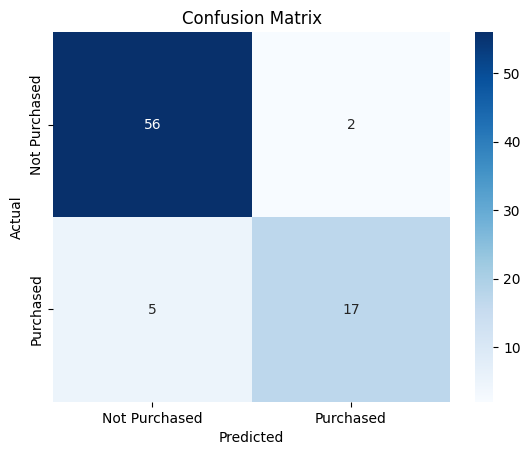

In [54]:
# Step 8: Visualize the confusion matrix (optional)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()